In [10]:
import os
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, corr
import numpy as np
import pickle as pkl


In [11]:
# spark_home = "D:\Ali_Other\Spark\spark_unzipped"
spark_home = "D:/Boody/BigData/spark-3.5.1-bin-hadoop3"
os.environ["SPARK_HOME"] = spark_home

# Add Spark bin and executors to PATH
os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "bin")
os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "sbin")

# Add Spark Python libraries to PYTHONPATH
os.environ["PYTHONPATH"] = os.path.join(spark_home, "python") + os.pathsep + os.environ.get("PYTHONPATH", "")
os.environ["PYTHONPATH"] += os.pathsep + os.path.join(spark_home, "python", "lib")

# Add PySpark to the system path
os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "python", "lib", "pyspark.zip")
os.environ["PATH"] += os.pathsep + os.path.join(spark_home, "python", "lib", "py4j-0.10.9-src.zip")

os.environ['PYSPARK_DRIVER_PYTHON'] = 'jupyter'
os.environ['PYSPARK_DRIVER_PYTHON_OPTS'] = 'lab'
os.environ['PYSPARK_PYTHON'] = 'python'

In [12]:

spark = SparkSession.builder \
    .appName("PySpark-Script") \
    .config("spark.executor.memory", "20g") \
    .config("spark.driver.memory", "20g") \
    .getOrCreate()

In [13]:
# Load the data
data = spark.read.csv("D:/Boody/BigData/FIFA_Players_Analysis/Data/Preprocessed/Normalized_male_players (legacy)_23.csv", header=True, inferSchema=True)
# print data schema
data.printSchema()


root
 |-- player_id: integer (nullable = true)
 |-- fifa_version: double (nullable = true)
 |-- short_name: string (nullable = true)
 |-- player_positions: string (nullable = true)
 |-- overall: double (nullable = true)
 |-- potential: double (nullable = true)
 |-- value_eur: double (nullable = true)
 |-- wage_eur: double (nullable = true)
 |-- age: double (nullable = true)
 |-- height_cm: double (nullable = true)
 |-- weight_kg: double (nullable = true)
 |-- league_id: double (nullable = true)
 |-- league_name: string (nullable = true)
 |-- league_level: double (nullable = true)
 |-- club_team_id: double (nullable = true)
 |-- club_name: string (nullable = true)
 |-- club_position: string (nullable = true)
 |-- club_jersey_number: double (nullable = true)
 |-- club_contract_valid_until_year: double (nullable = true)
 |-- nationality_id: double (nullable = true)
 |-- nationality_name: string (nullable = true)
 |-- preferred_foot: double (nullable = true)
 |-- weak_foot: double (nullabl

In [14]:
K = 5
X = ['short_name', 'value_eur', 'wage_eur', 'international_reputation', 'overall', 'potential', 'movement_reactions', 'body_type_Unique', 'mentality_composure', 'rcm', 'cm', 'lcm', 'mentality_vision', 'ram', 'cam', 'lam', 'rm']



In [15]:
# Select the features
data = data.select(X)

# split the data into training and testing
train, test = data.randomSplit([0.8, 0.2])

# # Correlation matrix
# corr_matrix = np.zeros((len(X), len(X)))
# for i in range(1, len(X)):
#     for j in range(1, len(X)):
#         corr_matrix[i, j] = train.corr(X[i], X[j])


In [16]:
# # Split the train into features and labels
# # the features are X[2:] and the label is X[1]
# features = train.select(X[2:])
# label = train.select(X[1])

In [17]:
# Take one random sample from test
sample = test.sample(False, 0.1)   
# False y3ny mfeesh replacement tany, y3ny msh bye5tar el 7aga kaza mara
# 0.1 y3ny 10% mn el data hna5odha sample

# print it
# sample = sample.take(1)
print(sample.select(X[2:]).take(1))

[Row(wage_eur=0.051348999129677976, international_reputation=0.0, overall=0.5555555555555556, potential=0.6538461538461539, movement_reactions=0.5921052631578947, body_type_Unique=0.0, mentality_composure=0.5891666677255442, rcm=0.5974025974025974, cm=0.5974025974025974, lcm=0.5974025974025974, mentality_vision=0.6989247311827957, ram=0.6835443037974683, cam=0.6835443037974683, lam=0.6835443037974683, rm=0.6794871794871795)]


In [18]:
train_rdd = train.limit(100).rdd
# print size of train_rdd
print(train_rdd.count())

Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 9.0 failed 1 times, most recent failure: Lost task 0.0 in stage 9.0 (TID 85) (DESKTOP-JU17QC2 executor driver): org.apache.spark.SparkException: Python worker exited unexpectedly (crashed)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:612)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:594)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:789)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1049)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2438)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	at java.base/java.lang.Thread.run(Thread.java:1623)
Caused by: java.io.EOFException
	at java.base/java.io.DataInputStream.readInt(DataInputStream.java:386)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:774)
	... 32 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2856)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2792)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2791)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2791)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1247)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1247)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3060)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2994)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2983)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:989)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2419)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2438)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2463)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1049)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:410)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1048)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:195)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:75)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:52)
	at java.base/java.lang.reflect.Method.invoke(Method.java:578)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:1623)
Caused by: org.apache.spark.SparkException: Python worker exited unexpectedly (crashed)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:612)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator$$anonfun$1.applyOrElse(PythonRunner.scala:594)
	at scala.runtime.AbstractPartialFunction.apply(AbstractPartialFunction.scala:38)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:789)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:766)
	at org.apache.spark.api.python.BasePythonRunner$ReaderIterator.hasNext(PythonRunner.scala:525)
	at org.apache.spark.InterruptibleIterator.hasNext(InterruptibleIterator.scala:37)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at org.apache.spark.InterruptibleIterator.foreach(InterruptibleIterator.scala:28)
	at scala.collection.generic.Growable.$plus$plus$eq(Growable.scala:62)
	at scala.collection.generic.Growable.$plus$plus$eq$(Growable.scala:53)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:105)
	at scala.collection.mutable.ArrayBuffer.$plus$plus$eq(ArrayBuffer.scala:49)
	at scala.collection.TraversableOnce.to(TraversableOnce.scala:366)
	at scala.collection.TraversableOnce.to$(TraversableOnce.scala:364)
	at org.apache.spark.InterruptibleIterator.to(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toBuffer(TraversableOnce.scala:358)
	at scala.collection.TraversableOnce.toBuffer$(TraversableOnce.scala:358)
	at org.apache.spark.InterruptibleIterator.toBuffer(InterruptibleIterator.scala:28)
	at scala.collection.TraversableOnce.toArray(TraversableOnce.scala:345)
	at scala.collection.TraversableOnce.toArray$(TraversableOnce.scala:339)
	at org.apache.spark.InterruptibleIterator.toArray(InterruptibleIterator.scala:28)
	at org.apache.spark.rdd.RDD.$anonfun$collect$2(RDD.scala:1049)
	at org.apache.spark.SparkContext.$anonfun$runJob$5(SparkContext.scala:2438)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:93)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:166)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1144)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:642)
	... 1 more
Caused by: java.io.EOFException
	at java.base/java.io.DataInputStream.readInt(DataInputStream.java:386)
	at org.apache.spark.api.python.PythonRunner$$anon$3.read(PythonRunner.scala:774)
	... 32 more


In [ ]:
# def distance(record):
#     return np.sqrt(np.sum((record - sample) ** 2))

In [ ]:
# Collect the necessary data from sample
testing_point = sample.collect()[0]

def CalculateDistance(x):
    distance = 0
    for i in range(2, len(x)):
        distance += (x[i] - testing_point[i]) ** 2
    return np.sqrt(distance)

distances = train_rdd.map(CalculateDistance)
print(distances.take(11))

# Sort the distances
# sorted_distances = distances.sortBy(lambda x: x)

# # Print the first 5 elements of the sorted RDD
# print(sorted_distances.take(5))
# [[0.523714338301096, 0.6511104530387805], 0.36612496930540456]

In [ ]:
def sum_distances(a, b):
    # with open('txt.txt', 'a') as f:
    #     f.write(str(a))
    #     f.write('\n')
    return a + b

total_distance = distances.reduce(sum_distances)
print(total_distance)

In [ ]:
def lister(a, b):
    array = []
    array.append(a)
    array.append(b)
    # return b
    return list(array)

In [ ]:
# def flatten(xss):
    # return [x for xs in xss for x in xs]


def SortDistances(a, b):
    # append a and b
    a = np.array(a).flatten()
    a = np.append(a, b)

    return sorted(a)[:K]
    


In [ ]:
sorted_distances = distances.reduce(SortDistances)
print(sorted_distances)

In [ ]:
predicted_value = np.mean(sorted_distances)
print(predicted_value)

R2 score

![1 _HbrAW-tMRBli6ASD5Bttw.webp](<attachment:1 _HbrAW-tMRBli6ASD5Bttw.webp>)
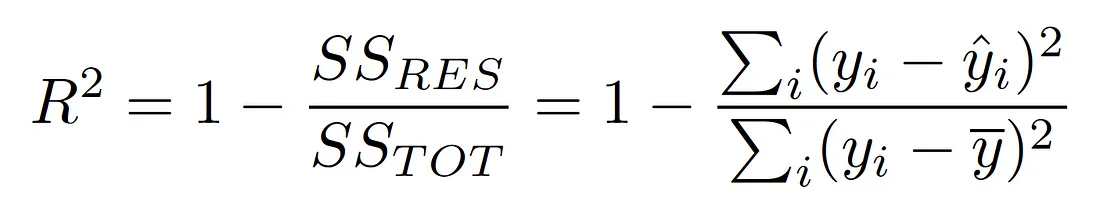

In [ ]:
num = 0
denum = 0
y_mean = train_rdd.map(lambda x: x[1]).mean()
counter = 0
for testing_point in test.collect():
    try:
        counter += 1
        if counter % 10 == 0:
            print("counter:", counter)
            print("R2 score:", 1 - num / denum)
        testing_point = testing_point
        distances = train_rdd.map(CalculateDistance)
        sorted_distances = distances.reduce(SortDistances)
        predicted_value = np.mean(sorted_distances)
        # print(predicted_value)
        num += (testing_point[1] - predicted_value) ** 2
        denum += (testing_point[1] - y_mean) ** 2
        print(f"predicted value {predicted_value}, actual value {testing_point[1]}, difference {testing_point[1] - predicted_value}")
    except Exception as e:
        print("error:", e)
        print("error at counter:", counter)
        print("R2 score:", 1 - num / denum)

r2 = 1 - num / denum
print("R2 score:", r2)



In [ ]:
spark.stop()